# Foodborne disease Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\akash\Documents\dataset\kaggle dataset\Foodborne disease.zip")
df

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19114,2015,December,Wisconsin,Restaurant,NaN,NaN,Norovirus genogroup II,GII_14,Confirmed,4,0.0,0.0
19115,2015,December,Wisconsin,Private Home/Residence,Salsa,NaN,Norovirus genogroup II,GII_2,Confirmed,16,0.0,0.0
19116,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,NaN,NaN,Norovirus genogroup II,GII_17 Kawasaki (2014),Confirmed,43,3.0,0.0
19117,2015,December,Wisconsin,Fast Food Restaurant,NaN,NaN,Norovirus genogroup II,GII_2,Confirmed,5,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19119 entries, 0 to 19118
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               19119 non-null  int64  
 1   Month              19119 non-null  object 
 2   State              19119 non-null  object 
 3   Location           16953 non-null  object 
 4   Food               10156 non-null  object 
 5   Ingredient         1876 non-null   object 
 6   Species            12500 non-null  object 
 7   Serotype/Genotype  3907 non-null   object 
 8   Status             12500 non-null  object 
 9   Illnesses          19119 non-null  int64  
 10  Hospitalizations   15494 non-null  float64
 11  Fatalities         15518 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.8+ MB


In [7]:
df.drop(columns=['Ingredient','Serotype/Genotype'],inplace=True)

In [13]:
df['Food']=df['Food'].fillna('')
df['Species']=df['Species'].fillna('')
df['Status']=df['Status'].fillna('')
df['Location']=df['Location'].fillna(df['Location'].mode()[0])
df['Hospitalizations']=df['Hospitalizations'].fillna(df['Hospitalizations'].median())
df['Fatalities']=df['Fatalities'].fillna(df['Fatalities'].median())

In [16]:
df['Location'].value_counts()

Location
Restaurant                                                               12614
Private Home/Residence                                                    1681
Catering Service                                                          1089
Banquet Facility                                                           367
Fast Food Restaurant                                                       366
                                                                         ...  
Private Home/Residence; Grocery Store; Child Daycare                         1
Restaurant; Private Home/Residence; Catering Service; Fair/Festival          1
Restaurant; Private Home/Residence; Grocery Store; Religious Facility        1
Child Daycare; Religious Facility                                            1
Hotel/Motel                                                                  1
Name: count, Length: 161, dtype: int64

<Axes: xlabel='Location'>

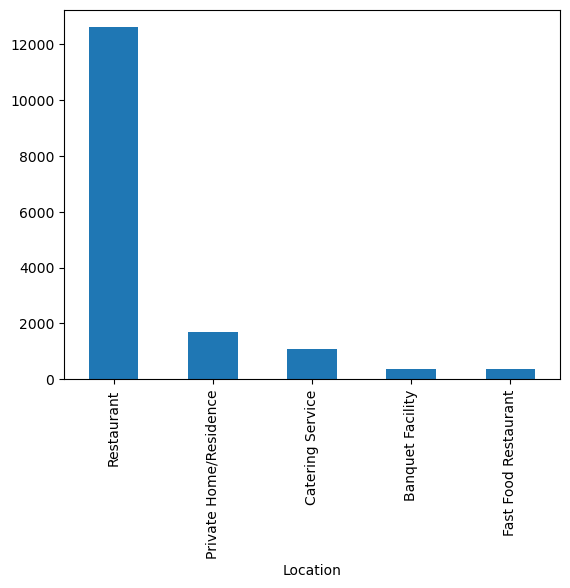

In [17]:
df['Location'].value_counts().head().plot.bar()

- Large number of people(12614) had food from Restaurant.
- some people had food from Private Home/Residence ,Catering Service ,nquet Facility and Fast Food Restaurant other than restaurat.
- other few people had food from some different location.

In [18]:
df['Food'].value_counts()

Food
                                                      8963
Multiple Foods                                         206
Oysters, Raw                                           165
Ground Beef, Hamburger                                 127
Salad, Unspecified                                     118
                                                      ... 
Goat, Other                                              1
Chicken, Nuggets/Fingers; Coleslaw; Potato, Mashed       1
Sandwich, Club; Potato Salad                             1
Milk, 2% Milk Pasteurized                                1
Cookies, Chocolate Chip                                  1
Name: count, Length: 3128, dtype: int64

- In common , people ate Multiple Foods,Oysters Raw ,Ground Beef Hamburger and Salad Unspecified food than other food items.

In [61]:
ill = df.groupby('Location')['Illnesses'].agg(['sum'])
loc_ill=ill.sort_values(by='sum',ascending=False)
loc_ill

,sum
Location,
Restaurant,190337
Catering Service,36044
Private Home/Residence,22564
Prison/Jail,20608
School/College/University,19910
...,...
Fast Food Restaurant; Hospital,7
Other (Describe In Remarks); Unknown,5
Restaurant; Office/Indoor Workplace; School/College/University,4


<Axes: xlabel='Location'>

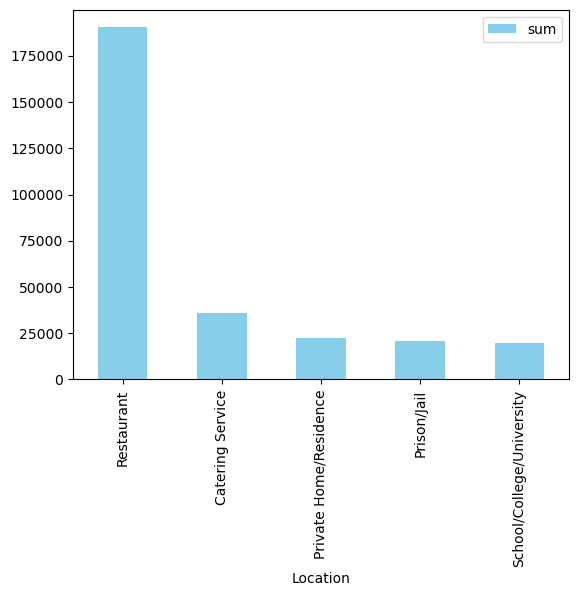

In [62]:
loc_ill.head().plot.bar(color='skyblue')

- From Restaurant's food ,Large number of people(190337) get unwell.
- Food quality of Restaurant is very bad, that may be because huge amount of people have illness from their food.
- Catering Service have second most worst foods.
- Private Home/Residence(22564),Prison/Jail(20608) and School/College/University(19910) are the others in top 5

In [76]:
ilsum=df['Illnesses'].sum()
res = loc_ill[loc_ill.index == 'Restaurant'].get('sum').get('Restaurant')
res_prcnt = (res/ilsum)*100
print(f'{res_prcnt} % ')

50.956145540798495 % 


- 50.95% of total illness person were have food from restaurant.

In [63]:
hsp=df.groupby('Location')['Hospitalizations'].agg(['sum'])
loc_hsp=hsp.sort_values(by='sum',ascending=False)
loc_hsp

,sum
Location,
Restaurant,7794.0
Private Home/Residence,2526.0
Catering Service,412.0
Unknown,389.0
Fast Food Restaurant,329.0
...,...
Private Home/Residence; Catering Service; Prison/Jail; Religious Facility,0.0
Private Home/Residence; Catering Service; Office/Indoor Workplace,0.0
Private Home/Residence; Banquet Facility; Catering Service; Grocery Store,0.0


<Axes: xlabel='Location'>

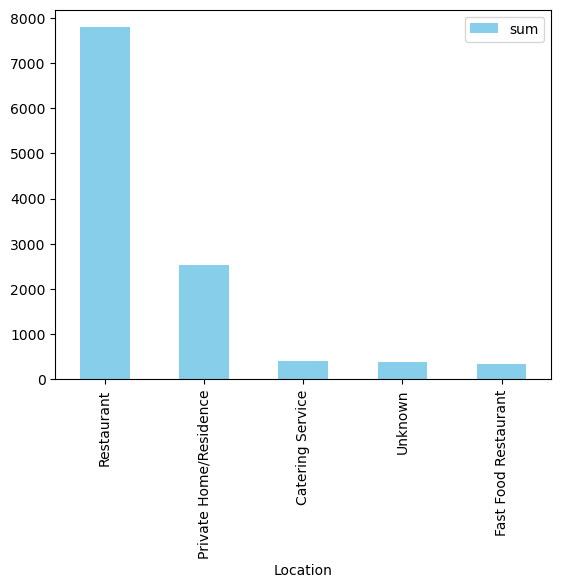

In [64]:
loc_hsp.head().plot.bar(color='skyblue')

- More people get Hospitalized had food from Restaurant.
- Restaurant's food quality is really bad, 190337 people were unwell and 7794.0 people get hospitalized had food from Restaurant.
- 2526 people from Private Home/Residence and 412 people from Catering Service had food and get hospitalized.

In [83]:
hosp_sum=df['Hospitalizations'].sum()
res_hosp = loc_hsp[loc_hsp.index == 'Restaurant'].get('sum').get('Restaurant')
res_hosp_prcnt = (res_hosp/hosp_sum)*100
print(f'{res_hosp_prcnt} % ')

53.08902663306314 % 


- 53.089 % of total hospitalized people had food from restaurant.


In [90]:
fat = df.groupby('Location')['Fatalities'].sum().sort_values(ascending=False)
fat

Location
Restaurant                                                                  160.0
Private Home/Residence                                                       82.0
Nursing Home/Assisted Living Facility                                        44.0
Grocery Store                                                                11.0
Hospital                                                                      6.0
                                                                            ...  
Office/Indoor Workplace; Prison/Jail                                          0.0
Office/Indoor Workplace; Nursing Home/Assisted Living Facility; Hospital      0.0
Office/Indoor Workplace; Hospital                                             0.0
Office/Indoor Workplace; Camp                                                 0.0
Private Home/Residence; Child Daycare                                         0.0
Name: Fatalities, Length: 161, dtype: float64

<Axes: xlabel='Location'>

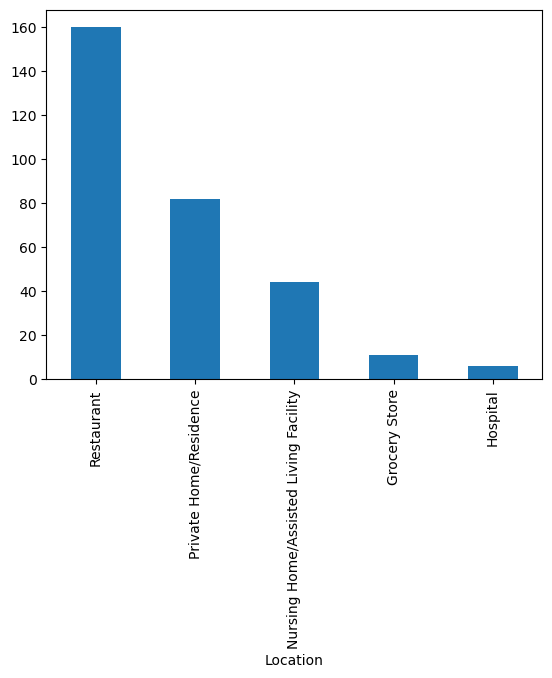

In [89]:
df.groupby('Location')['Fatalities'].sum().sort_values(ascending=False).head().plot.bar()

- MOst of food Fatalities are from restaurant food.
- 160 people lost their life because of ate restaurant food
- 82 people ate and died food from Private Home/Residence 
- Nursing Home/Assisted Living Facility and Grocery Store are the other food location that leads the death of some people from their food.

In [104]:
fat_ = df.groupby('Location')['Fatalities'].agg(['sum'])
fat1= fat_.sort_values(by='sum',ascending =False)
res_fat = fat1[fat1.index == 'Restaurant'].get('sum').get('Restaurant')

fat_sum= df['Fatalities'].sum()
res_fat_prcent = (res_fat/fat_sum)*100
print(f'{res_fat_prcent} %')

47.47774480712167 %


- 47.478 % of Fatalities people were had food from restaurant.

In [108]:
df['Species'].value_counts()

Species
                                                                     6619
Norovirus genogroup I                                                2744
Salmonella enterica                                                  2303
Norovirus genogroup II                                               1424
Norovirus unknown                                                     790
                                                                     ... 
Bacillus other                                                          1
Bacillus cereus; Clostridium perfringens; Bacterium                     1
Staphylococcus other                                                    1
Salmonella enterica; Clostridium perfringens; Salmonella enterica       1
Shigella sonnei; Campylobacter jejuni                                   1
Name: count, Length: 202, dtype: int64

<Axes: xlabel='Species'>

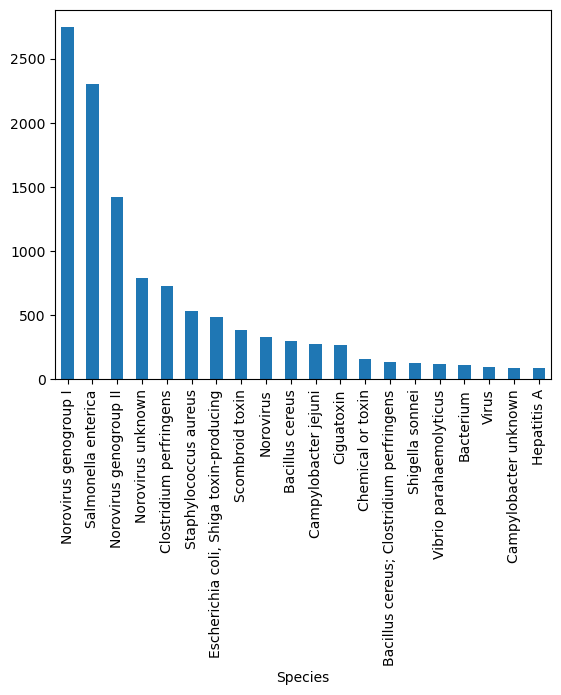

In [111]:
df['Species'].value_counts().iloc[1:].head(20).plot.bar()

- Norovirus genogroup I are the most common species of micro oraganisum that cases disease.
- Salmonella enterica are the second common ,Norovirus genogroup II  are third most common species of micro oraganisum.

- A very small amount of norovirus can make you sick.It's a highly contagious virus that causes vomiting and diarrhea in millions of people every year.
- Salmonella infection imposes a heavy burden on global public health.
- May be that was the reason why the number of death was increased.

In [112]:
df['Status'].value_counts()

Status
Confirmed                                                                                                                                        7909
                                                                                                                                                 6619
Suspected                                                                                                                                        4068
Suspected; Suspected                                                                                                                              310
Confirmed; Confirmed                                                                                                                              133
Confirmed; Suspected                                                                                                                               32
Confirmed; Confirmed; Confirmed                                                              

- Most of the illness was confirmed,that was a Foodborne disease
- 7909 people's Foodborne disease was Confirmed

In [113]:
df.groupby('Year')['Fatalities'].agg(['sum'])

,sum
Year,
1998,33.0
1999,10.0
2000,22.0
2001,11.0
2002,14.0
2003,24.0
2004,22.0
2005,8.0
2006,10.0


<Axes: xlabel='Year'>

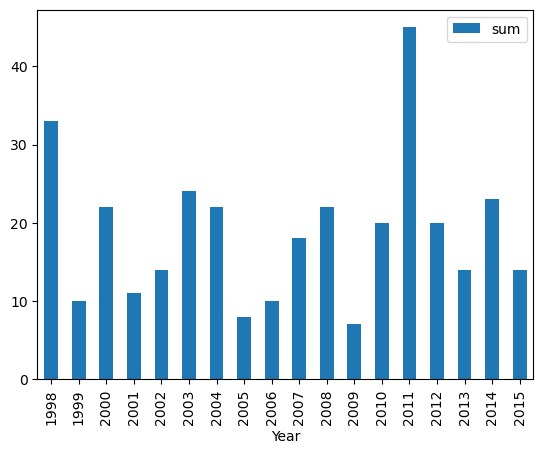

In [114]:
df.groupby('Year')['Fatalities'].agg(['sum']).plot.bar()

- Most Fatalities(40+) was reported in 2011
- Less Fatalities was reported in 2009 when compared to others.

# Conclusion


The analysis reveals a concerning trend regarding foodborne illnesses, with restaurants being a significant source of outbreaks, accounting for over half of the illnesses and hospitalizations, and nearly half of the fatalities. Poor food quality in restaurants poses a substantial public health risk, leading to a high number of illnesses and severe outcomes. Additionally, norovirus and Salmonella emerge as prevalent pathogens, underscoring the need for stringent food safety measures and hygiene practices to mitigate the spread of these infectious agents.